### Implementation of a delta-hedging strategy for a call option

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
# import our BSM price and delta functions
from BlackScholesMerton import BSM_price, BSM_delta


In [2]:
spot = 100
K = 100
r = 0.0
q = 0.0
sig = 0.18

maturity = 1

m = 360
dt = maturity / m

n_sim = 1000

Compute the true value of the call

In [3]:
C = BSM_price('call', spot, K, r, q, sig, maturity)
print('C = ' + str(C))

C = 7.171278517034423


Delta-hedging strategy (with zero risk-free rate and zero dividend rate)

In [4]:
np.random.seed(4123456)


In [5]:
synthetic_C = np.zeros(n_sim)

st = time()

for j in range(n_sim):
    
    # reset for each path
    S = spot
    T = maturity
    delta_C_prev = 0.0
    
    for i in range(m):
        
        delta_C = BSM_delta('call', S, K, r, q, sig, T)
        
        synthetic_C[j] += (delta_C - delta_C_prev)*S
        # Note - net position is always delta_c
    
        delta_C_prev = delta_C
        
        z = np.random.randn()
        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z)
        
        T = T - dt
    
    synthetic_C[j] += (-delta_C*S + np.maximum(S-K,0))

et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 20.746927976608276 seconds.


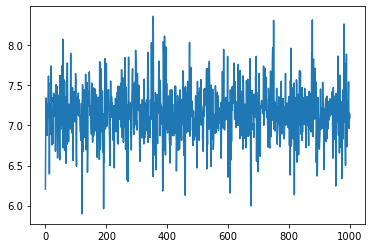

In [6]:
plt.plot(synthetic_C)
plt.show()

In [7]:
print('C = ' + str(C))
print('mean_synthetic_C = ' + str(np.mean(synthetic_C)))
print('std_synthetic_C = ' + str(np.std(synthetic_C, ddof=1)))

C = 7.171278517034423
mean_synthetic_C = 7.1584509836408055
std_synthetic_C = 0.32269892946693735
